In [ ]:
!pip install spotipy

In [ ]:
#First section of code pulling data follows:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import re
import IPython
from IPython.display import display

client_id = "bbb8b22380ff4e6183c58ce0d0e9975b"
client_secret = "e1fac3548c6d4c62b7fc91b9029c97c9"

client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

playlist_url = "https://open.spotify.com/playlist/2DCBk0AdKhUxb2ANXckhMO?si=d0a9dd06ac164826"

playlist_id_match = re.search(r'/playlist/([a-zA-Z0-9]{22})', playlist_url)
if playlist_id_match:
  playlist_id = playlist_id_match.group(1)
else:
  print("Error: Unable to extract playlist ID from the URL.")
  playlist_id = None

playlist_tracks = sp.playlist_tracks(playlist_id)

token_url = "https://accounts.spotify.com/api/token"
data_url = "https://api.spotify.com/v1/tracks"
headers = {"Authorization": "Bearer your_access_token"}

payload = {"grant_type": "client_credentials", "client_id": client_id, "client_secret": client_secret}
response = requests.post(token_url, data=payload)
response_json = response.json()
print(response.json)

access_token = response_json.get("access_token", None)
if access_token is None:
  print("Error retrieving access token")
else:
  headers["Authorization"] = "Bearer " + access_token

df_data = []
for track in playlist_tracks['items']:
  track_info = {
      "Title": track["track"]["name"],
      "Duration (ms)": track["track"]["duration_ms"],
      "Artists": ",".join([artist["name"] for artist in track["track"]["artists"]]),
      "Album": track["track"]["album"]["name"],
      "Popularity Score": track["track"]["popularity"]
  }
  audio_features = sp.audio_features(track["track"]["id"])[0]
  track_info.update(audio_features)
  df_data.append(track_info)

df = pd.DataFrame(df_data)

print(df)
#Retrieve data statistics
df.head()
df.describe()
df.info()


df1 = df[['Title', 'Artists', 'Album']]
df2 = df[['danceability', 'energy', 'instrumentalness', 'key', 'loudness', 'mode', 'Popularity Score', 'Duration (ms)']]

#Merge Data for less clunky analysis
df = pd.merge(df1, df2, left_index=True, right_index=True)

display(df1, df2)

#Create plots to display Audio features
df[['danceability', 'energy', 'instrumentalness', 'key', 'loudness', 'mode', 'Popularity Score']].plot()

plt.title('Audio Features')
plt.xlabel('Track')
plt.ylabel('Value')

#Display matplot
plt.show()

sns.pairplot(df, x_vars=['danceability', 'energy', 'instrumentalness', 'key', 'loudness', 'mode'], y_vars=['Popularity Score'+'Title'], height=10, aspect=1)

ERROR:spotipy.client:HTTP Error for GET to https://api.spotify.com/v1/playlists/Mzg4Niw5YzQwMzM1MzY5ZmEwYjQ1NTEzNjQzY2YxMTg5NzcxNDdhMWQ5NWVl/tracks with Params: {'limit': 100, 'offset': 0, 'fields': None, 'market': None, 'additional_types': 'track'} returned 404 due to Invalid playlist Id


SpotifyException: http status: 404, code:-1 - https://api.spotify.com/v1/playlists/Mzg4Niw5YzQwMzM1MzY5ZmEwYjQ1NTEzNjQzY2YxMTg5NzcxNDdhMWQ5NWVl/tracks?limit=100&offset=0&additional_types=track:
 Invalid playlist Id, reason: None

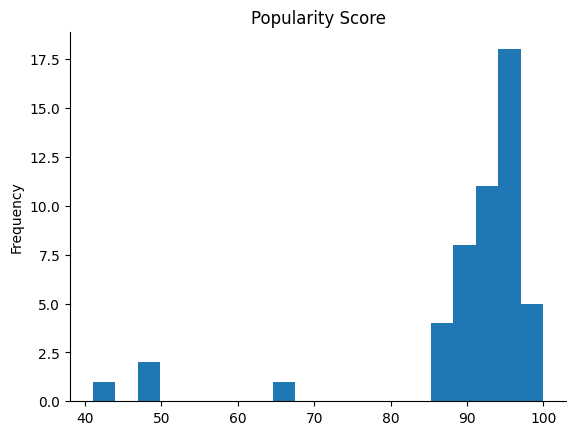

In [ ]:
from matplotlib import pyplot as plt
df1['Popularity Score'].plot(kind='hist', bins=20, title='Popularity Score')
plt.gca().spines[['top', 'right',]].set_visible(False)